In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def IULvsCAGR(data, start_year, end_year, cap, duration):

    startyear = start_year
    # Set index and convert date column to datetime
    data.set_index('Date', inplace=True)
    data.reset_index(inplace=True)
    data.rename(columns={'index': 'Date'}, inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])

    IUL = [1]
    curIUL = 1
    CAGR = []

    # Initialize with the first year's data
    CurYearData = data[data['Date'].dt.year == start_year + 1]

    # Calculate IUL returns
    while start_year < end_year:
        CurYearData = data[data['Date'].dt.year == start_year]
        CurYearData.reset_index(inplace=True)
        CurYearData = CurYearData['Adj Close']
        NextYearData = data[data['Date'].dt.year == start_year + 1]
        NextYearData.reset_index(inplace=True)
        NextYearData = NextYearData['Adj Close']
        totalInc = 0
        for i in range(1, len(NextYearData)):
            inc = NextYearData[i] / CurYearData[i] - 1
            if inc < 0: 
                inc = 0
            elif inc > cap:
                inc = cap
            totalInc += inc
        totalInc /= len(NextYearData)
        
        curIUL *= (1 + totalInc)
        IUL.append(curIUL)
        start_year += 1

    # Calculate CAGR
    start_year = startyear  # Reset start_year to its initial value
    while start_year + duration <= end_year:
        CurYearData = data[data['Date'].dt.year == start_year]
        CurYearData.reset_index(inplace=True)
        CurYearData = CurYearData['Adj Close']
        NextYearData = data[data['Date'].dt.year == start_year + duration]
        NextYearData.reset_index(inplace=True)
        NextYearData = NextYearData['Adj Close']
        totalInc = 0
        for i in range(1, len(NextYearData)):
            inc = ((NextYearData[i] / CurYearData[i]) ** (1 / duration) - 1) * 100
            totalInc += inc
        CAGR.append(totalInc / len(NextYearData))
        start_year += 1

    # Generate year list and calculate IUL25
    length = len(IUL)
    start_year = startyear  # Reset start_year to its initial value for this loop
    yearList = []
    IUL25 = []
    CAGR25 = []
    for i in range(duration, length):
        startIUL = IUL[i - duration]
        endIUL = IUL[i]
        endYear = start_year + duration
        yearList.append(f"{start_year}-{endYear}")
        IUL25.append(((endIUL / startIUL) ** (1 / duration) - 1) * 100)
        start_year += 1

    # Plot results
    plt.figure(figsize=(14, 7))
    plt.plot(yearList, CAGR, label='S&P 500 Annual Return')
    plt.plot(yearList, IUL25, label='IUL Return-S&P 500 Annual point to point')

    # Add labels for CAGR
    for i, txt in enumerate(CAGR):
        plt.text(yearList[i], CAGR[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)

    # Add labels for IUL25
    for i, txt in enumerate(IUL25):
        plt.text(yearList[i], IUL25[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)

    avg_CAGR = np.mean(CAGR)
    avg_IUL25 = np.mean(IUL25)

    plt.text(yearList[-1], 10, f'Note: IUL Cap: {cap*100:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
    plt.text(yearList[-1], 13, f'Average S&P 500 Annual Return: {avg_CAGR:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
    plt.text(yearList[-1], 12, f'Average S&P 500 IUL Return: {avg_IUL25:.2f}%', color='orange', ha='right', va='top', fontsize=10)

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Comparison of S&P 500 Annual Return and IUL Return')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
    plt.ylim(0, 16)
    plt.tight_layout()  # Adjust layout to make room for x-axis labels
    plt.show()

In [6]:
def RILA(data, start_year, end_year, cap, typebf, typecp, typef, buffer, duration, participationRate = 1):

    startyear = start_year
    # Set index and convert date column to datetime
    data.set_index('Date', inplace=True)
    data.reset_index(inplace=True)
    data.rename(columns={'index': 'Date'}, inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])

    RILA = []
    #curRILA = 1
    CAGR = []
    if typecp == 'c':
        if typebf == 'b':
            while start_year + duration <= end_year:
                CurYearData = data[data['Date'].dt.year == start_year]
                CurYearData.reset_index(inplace=True)
                CurYearData = CurYearData['Adj Close']
                NextYearData = data[data['Date'].dt.year == start_year + duration]
                NextYearData.reset_index(inplace=True)
                NextYearData = NextYearData['Adj Close']
                totalInc = 0
                for i in range(1, len(NextYearData)):
                    inc = NextYearData[i] / CurYearData[i] - 1
                    if inc < 0 and inc > 0 - buffer: 
                        inc = 0
                    elif inc <= 0 - buffer:
                        inc = inc + buffer
                    elif inc > 0:
                        inc = inc * participationRate
                        if inc > cap:
                            inc = cap
                    totalInc += inc
                totalInc /= len(NextYearData)
            
                #curRILA *= (1 + totalInc)
                RILA.append(totalInc * 100)
                start_year += 1
        elif typebf == 'f':
            while start_year + duration <= end_year:
                CurYearData = data[data['Date'].dt.year == start_year]
                CurYearData.reset_index(inplace=True)
                CurYearData = CurYearData['Adj Close']
                NextYearData = data[data['Date'].dt.year == start_year + duration]
                NextYearData.reset_index(inplace=True)
                NextYearData = NextYearData['Adj Close']
                totalInc = 0
                for i in range(1, len(NextYearData)):
                    inc = NextYearData[i] / CurYearData[i] - 1
                    if inc < 0 - buffer: 
                        inc = 0 - buffer
                    elif inc > 0:
                        inc = inc * participationRate
                        if inc > cap:
                            inc = cap
                    totalInc += inc
                totalInc /= len(NextYearData)
        
                #curRILA *= (1 + totalInc)
                RILA.append(totalInc * 100)
                start_year += 1
    elif typecp == 'p':
        if typebf == 'b':
            while start_year + duration <= end_year:
                CurYearData = data[data['Date'].dt.year == start_year]
                CurYearData.reset_index(inplace=True)
                CurYearData = CurYearData['Adj Close']
                NextYearData = data[data['Date'].dt.year == start_year + duration]
                NextYearData.reset_index(inplace=True)
                NextYearData = NextYearData['Adj Close']
                totalInc = 0
                for i in range(1, len(NextYearData)):
                    inc = NextYearData[i] / CurYearData[i] - 1
                    if inc < 0 and inc > 0 - buffer: 
                        inc = 0
                    elif inc <= 0 - buffer:
                        inc = inc + buffer
                    elif inc > 0:
                        inc = cap
                    totalInc += inc
                totalInc /= len(NextYearData)
            
                #curRILA *= (1 + totalInc)
                RILA.append(totalInc * 100)
                start_year += 1
        elif typebf == 'f':
            while start_year + duration <= end_year:
                CurYearData = data[data['Date'].dt.year == start_year]
                CurYearData.reset_index(inplace=True)
                CurYearData = CurYearData['Adj Close']
                NextYearData = data[data['Date'].dt.year == start_year + duration]
                NextYearData.reset_index(inplace=True)
                NextYearData = NextYearData['Adj Close']
                totalInc = 0
                for i in range(1, len(NextYearData)):
                    inc = NextYearData[i] / CurYearData[i] - 1
                    if inc < 0 - buffer: 
                        inc = 0 - buffer
                    elif inc > 0:
                        inc = cap
                    totalInc += inc
                totalInc /= len(NextYearData)
        
                #curRILA *= (1 + totalInc)
                RILA.append(totalInc * 100)
                start_year += 1

    
    # Calculate CAGR
    start_year = startyear  # Reset start_year to its initial value
    yearList = []
    while start_year + duration <= end_year:
        endYear = start_year + duration
        yearList.append(f"{start_year}-{endYear}")
        CurYearData = data[data['Date'].dt.year == start_year]
        CurYearData.reset_index(inplace=True)
        CurYearData = CurYearData['Adj Close']
        NextYearData = data[data['Date'].dt.year == endYear]
        NextYearData.reset_index(inplace=True)
        NextYearData = NextYearData['Adj Close']
        totalInc = 0
        for i in range(1, len(NextYearData)):
            inc = ((NextYearData[i] / CurYearData[i]) - 1) * 100
            totalInc += inc
        CAGR.append(totalInc / len(NextYearData))
        start_year += 1

    # Plot results
    plt.figure(figsize=(14, 7))

    # Add labels for CAGR
    for i, txt in enumerate(CAGR):
        plt.text(yearList[i], CAGR[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)

    # Add labels for RILA
    for i, txt in enumerate(RILA):
        plt.text(yearList[i], RILA[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)

    avg_CAGR = np.mean(CAGR)
    avg_RILAout = np.mean(RILA)
    if type == 'b':
        plt.text(yearList[-1], 0, f'Note: RILA Cap: {cap*100:.2f}%, Buffer: {buffer*100:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
    else:
        plt.text(yearList[-1], 0, f'Note: RILA Cap: {cap*100:.2f}%, Floor: {buffer*100:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
    if typef == '^GSPC':
        plt.title('Comparison of S&P 500 Annual Return and RILA Return')
        plt.plot(yearList, CAGR, label='S&P 500 Annual Return')
        plt.plot(yearList, RILA, label='RILA Return-S&P 500 Annual point to point')
        plt.text(yearList[-1], np.max(CAGR) / 2, f'Average S&P 500 Annual Return: {avg_CAGR:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
        plt.text(yearList[-1], np.min(CAGR) / 2, f'Average S&P 500 RILA Return: {avg_RILAout:.2f}%', color='orange', ha='right', va='top', fontsize=10)
    elif typef == '^RUT':
        plt.title('Comparison of Russell 2000 Annual Return and RILA Return')
        plt.plot(yearList, CAGR, label='Russell 2000 Annual Return')
        plt.plot(yearList, RILA, label='RILA Return-Russell 2000 Annual point to point')
        plt.text(yearList[-1], np.max(CAGR) / 2, f'Average Russell 2000 Annual Return: {avg_CAGR:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
        plt.text(yearList[-1], np.min(CAGR) / 2, f'Average Russell 2000 RILA Return: {avg_RILAout:.2f}%', color='orange', ha='right', va='top', fontsize=10)
    elif typef == 'EAF':
        plt.title('Comparison of MSCI EAFE Annual Return and RILA Return')
        plt.plot(yearList, CAGR, label='MSCI EAFE Annual Return')
        plt.plot(yearList, RILA, label='RILA Return-MSCI EAFE Annual point to point')
        plt.text(yearList[-1], np.min(CAGR), f'Average MSCI EAFE Annual Return: {avg_CAGR:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
        plt.text(yearList[-1], np.min(CAGR) / 2, f'Average MSCI EAFE RILA Return: {avg_RILAout:.2f}%', color='orange', ha='right', va='top', fontsize=10)
    elif typef == 'EEM':
        plt.title('Comparison of MSCI Emerging Annual Return and RILA Return')
        plt.plot(yearList, CAGR, label='MSCI Emerging Annual Return')
        plt.plot(yearList, RILA, label='RILA Return-MSCI Emerging Annual point to point')
        plt.text(yearList[-1], np.max(CAGR) / 2, f'Average MSCI Emerging Market Annual Return: {avg_CAGR:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
        plt.text(yearList[-1], np.min(CAGR) / 2, f'Average MSCI Emerging Market RILA Return: {avg_RILAout:.2f}%', color='orange', ha='right', va='top', fontsize=10)
    elif typef == 'DSI':
        plt.title('Comparison of MSCI-KLD-400 Annual Return and RILA Return')
        plt.plot(yearList, CAGR, label='MSCI-KLD-400 Annual Return')
        plt.plot(yearList, RILA, label='RILA Return-MSCI-KLD-400 Annual point to point')
        plt.text(yearList[-1], np.max(CAGR) / 2, f'Average MSCI KLD 400 Return: {avg_CAGR:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
        plt.text(yearList[-1], np.min(CAGR) / 2, f'Average MSCI KLD 400 RILA Return: {avg_RILAout:.2f}%', color='orange', ha='right', va='top', fontsize=10)
    elif typef == '^IXIC':
        plt.title('Comparison of Nasdaq 100 Annual Return and RILA Return')
        plt.plot(yearList, CAGR, label='Nasdaq 100 Annual Return')
        plt.plot(yearList, RILA, label='RILA Return-Nasdaq 100 Annual point to point')
        plt.text(yearList[-1], np.max(CAGR) / 2, f'Average Nasdaq 100 Return: {avg_CAGR:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
        plt.text(yearList[-1], np.min(CAGR) / 2, f'Average Nasdaq 100 RILA Return: {avg_RILAout:.2f}%', color='orange', ha='right', va='top', fontsize=10)
    elif typef == '^STOXX50E':
        plt.title('Comparison of EURO STOXX 50 Annual Return and RILA Return')
        plt.plot(yearList, CAGR, label='EURO STOXX 50 Annual Return')
        plt.plot(yearList, RILA, label='RILA Return-EURO STOXX 50 Annual point to point')
        plt.text(yearList[-1], np.max(CAGR) / 2, f'Average EURO STOXX 50 Return: {avg_CAGR:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
        plt.text(yearList[-1], np.min(CAGR) / 2, f'Average EURO STOXX 50 RILA Return: {avg_RILAout:.2f}%', color='orange', ha='right', va='top', fontsize=10)
    # elif typef == 'DSI':
    #     plt.title('Comparison of MSCI-KLD-400 Annual Return and RILA Return')
    #     plt.plot(yearList, CAGR, label='MSCI-KLD-400 Annual Return')
    #     plt.plot(yearList, RILA, label='RILA Return-MSCI-KLD-400 Annual point to point')
    #     plt.text(yearList[-1], np.min(CAGR), f'Average MSCI KLD 400 Return: {avg_CAGR:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
    #     plt.text(yearList[-1], np.min(CAGR) / 2, f'Average MSCI KLD 400 RILA Return: {avg_RILAout:.2f}%', color='orange', ha='right', va='top', fontsize=10)

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ymax = max(np.max(CAGR), np.max(RILA))
    ymin = min(np.min(CAGR), np.min(RILA))
    plt.ylim(ymin, ymax)
    plt.tight_layout()  # Adjust layout to make room for x-axis labels
    plt.show()

In [4]:
# data = pd.read_csv('sp500_data_with_weekends.csv')

# def get_bf_type():
#     while True:
#         rila_type = input("Enter the type of RILA, 'b' for buffer and 'f' for floor: ").strip().lower()
#         if rila_type in ['b', 'f']:
#             return rila_type
#         else:
#             print("Invalid input. Please enter 'b' for buffer or 'f' for floor.")
# def get_cp_type():
#     while True:
#         print("performance trigger only exist in 1 year term 10% buffer or floor")
#         rila_type = input("Enter the type of cap, 'c' for cap and 'p' for performance trigger:").strip().lower()
#         if rila_type in ['c', 'p']:
#             return rila_type
#         else:
#             print("Invalid input. Please enter 'c' for cap or 'p' for performance trigger.")

# # Get user inputs
# start_year = int(input('Enter the start year: '))
# end_year = int(input("Enter the end year: "))
# typebf = get_bf_type()
# typecp = get_cp_type()
# buffer = float(input("Enter the amount of buffer or floor as a decimal: "))
# cap = float(input("Enter the RILA cap as a decimal: "))
# duration = int(input("Enter the duration of investment: "))

# # Call the function with user inputs
# RILA(data, start_year, end_year, cap, typebf, typecp, buffer, duration)

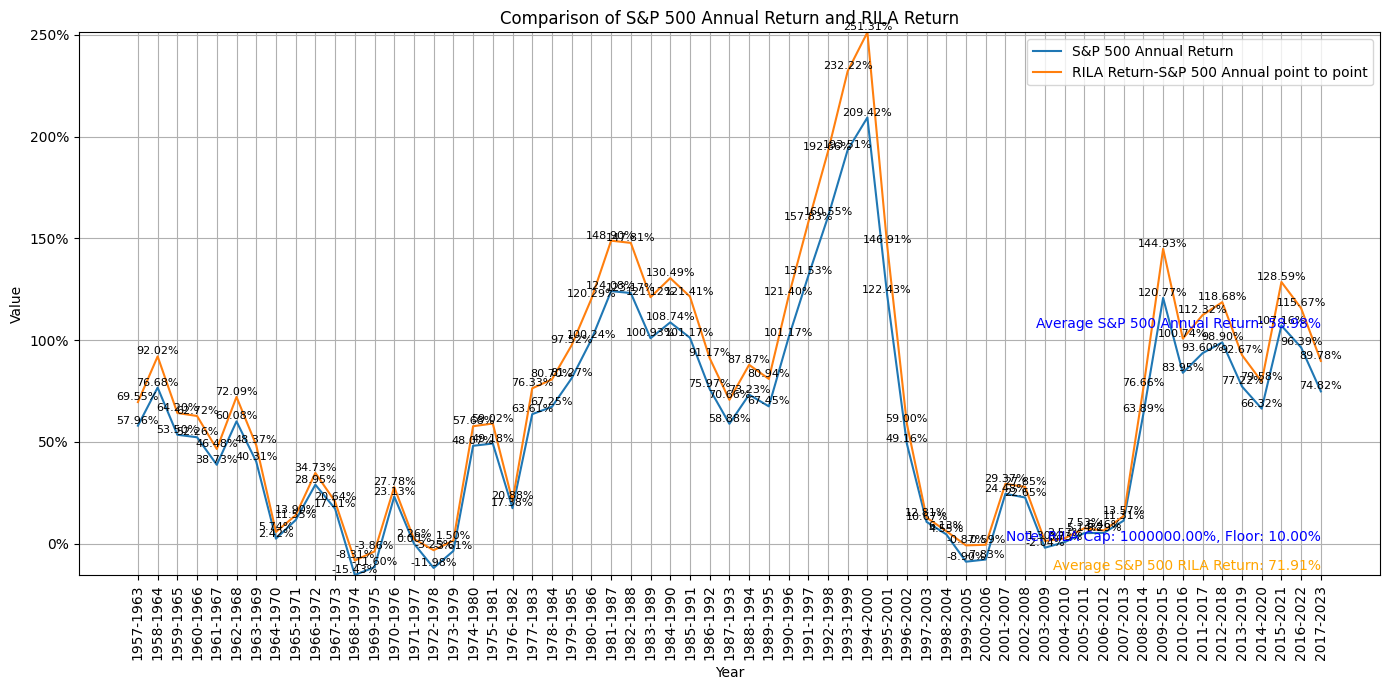

In [7]:
sp500data = pd.read_csv('sp500_data_with_weekends.csv')
russelldata = pd.read_csv('Russell 2000_data_with_weekends.csv')
nasdaqdata = pd.read_csv('Nasdaq_data_with_weekends.csv')
EAFdata = pd.read_csv('MSCI-EAFE_with_weekends.csv')
EEMdata = pd.read_csv('MSCI-Emerging_with_weekends.csv')
DSIdata = pd.read_csv('MSCI-KLD-400_with_weekends.csv')
STOXX50data = pd.read_csv('EURO-STOXX-50_with_weekends.csv')

#market types: '^GSPC": sp500, sp500 starts in 1957
#market types: '^IXIC": nasdaq100, nasdaq100 starts in 1972
#market types: '^RUT": Russell 2000, Russell starts in 1988
#market types: 'EAF": MSCI EAFE, EAFE starts in 2002
#market types: 'EEM": MSCI Emerging Market, MSCI Emerging Market starts in 2004
#market types: 'DSI": MSCI KLD 400, MSCI KLD 400 starts in 2007
#market types: '^STOXX50E": EURO STOXX 50, EURO STOXX 50 starts in 2008
#if uncapped, enter a big number like 10000
#RILA(data, start_year, end_year, cap, typebf, typecp, typef, buffer, duration, participationRate = 1):
RILA(sp500data, 1957, 2023, 10000, 'b', 'c','^GSPC', 0.1, 6, 1.2)

#RILA(russelldata, 1988, 2023, 0.1525, 'b', 'c','^RUT', 0.1, 1)


